In [1]:
# 24 archivos??

# Obtener los tickers que siempre están en NAFTRAC, que siempre se repiten
# Deberían ser menos de 35



#### LAB 1 (Pasiva)

1. Leer archiovs Naftrac / Obtener tickers repetidos
- 32 tickers + cash = 100%
- Pesos(w): Naftrac (31-01-2021)

2. Precios de los 32 tickers en las 24 fechas (obtener precios
- Guradar precios.csv

3. Pasiva 
- Portafolio inicial
    - Capital (1M)
    - Cash

In [1]:
import functions # Archivo de funciones

In [2]:
csv_files = functions.read_multiple_csv("files")
csv_df = csv_files[1] # 1 para dataframe 0 para archivos (direcciones)
csv_df

,Ticker,Nombre,Clase de activo,Peso (%),Precio,Acciones,Valor de mercado,Valor nominal,Sector,Unnamed: 9,ISIN,Bolsa de valores,Ubicación,Moneda,Mercado de divisas,Tipo de Cambio,SEDOL,Unnamed: 1,Unnamed: 10
0,AMXL,AMERICA MOVIL L,Equity,11.86,15.58,"433,866,211.00","6,759,635,567.38","6,759,635,567.38",Comunicación,2667470,MXP001691213,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
1,GFNORTEO,GPO FINANCE BANORTE,Equity,10.81,137.48,"44,842,100.00","6,164,891,908.00","6,164,891,908.00",Financieros,2421041,MXP370711014,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
2,WALMEX*,WALMART DE MEXICO V,Equity,10.63,65.40,"92,646,791.00","6,059,100,131.40","6,059,100,131.40",Productos básicos de consumo,BW1YVH8,MX01WA000038,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
3,FEMSAUBD,FOMENTO ECONOMICO MEXICANO,Equity,9.99,167.39,"34,004,964.00","5,692,090,923.96","5,692,090,923.96",Productos básicos de consumo,2242059,MXP320321310,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
4,GMEXICOB,GRUPO MEXICO B,Equity,9.95,97.14,"58,397,693.00","5,672,751,898.02","5,672,751,898.02",Materiales,2643674,MXP370841019,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,BOLSAA,BOLSA MEXICANA DE VALORES,Equity,0.63,36.39,"9,134,957.00","332,421,085.23","332,421,085.23",Financieros,NaN,MX01BM1B0000,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,B39VVF6,NaN,NaN
32,VOLARA,CONTROLADORA VUELA COMPANIA DE AVI,Equity,0.55,17.98,"16,192,902.00","291,148,377.96","291,148,377.96",Industriales,NaN,MX01VO000009,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,BDZDPH6,NaN,NaN
33,RA,REGIONAL SAB DE CV,Equity,0.51,108.77,"2,491,078.00","270,954,554.06","270,954,554.06",Financieros,NaN,MX01R0000006,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,BG1Z6X0,NaN,NaN
34,MEGACPO,MEGACABLE HOLDINGS CPO,Equity,0.46,42.25,"5,783,295.00","244,344,213.75","244,344,213.75",Comunicación,NaN,MX01ME090003,Bolsa Mexicana De Valores,México,MXN,MXN,1.0,B292SM8,NaN,NaN


In [3]:
c_tickers = functions.get_constant_tickers(csv_df, 'MXN.MX')
c_tickers

['AC.MX',
 'ALFAA.MX',
 'ALSEA.MX',
 'AMXL.MX',
 'ASURB.MX',
 'BBAJIOO.MX',
 'BIMBOA.MX',
 'BOLSAA.MX',
 'CEMEXCPO.MX',
 'CUERVO.MX',
 'ELEKTRA.MX',
 'FEMSAUBD.MX',
 'GAPB.MX',
 'GCARSOA1.MX',
 'GCC.MX',
 'GFINBURO.MX',
 'GFNORTEO.MX',
 'GMEXICOB.MX',
 'GRUMAB.MX',
 'KIMBERA.MX',
 'KOFUBL.MX',
 'LIVEPOLC-1.MX',
 'MEGACPO.MX',
 'OMAB.MX',
 'ORBIA.MX',
 'PE&OLES.MX',
 'PINFRA.MX',
 'Q.MX',
 'TLEVISACPO.MX',
 'VESTA.MX',
 'WALMEX.MX']

In [4]:
# Pasivo

In [5]:
# Periodo 2+ años: 31-01-2021 a 25-01-2023

In [6]:
all_files = csv_files[0]

In [7]:
all_dates = functions.get_all_dates2(all_files)
all_dates

['20210531',
 '20220630',
 '20210730',
 '20210331',
 '20210630',
 '20220531',
 '20210430',
 '20230125',
 '20210226',
 '20220331',
 '20220126',
 '20221031',
 '20220930',
 '20210831',
 '20211130',
 '20221230',
 '20220729',
 '20210129',
 '20220228',
 '20211026',
 '20211231',
 '20210930',
 '20220429',
 '20221130',
 '20220831']

In [8]:
dates_fd = [functions.str_to_datetime(i, '%Y%m%d', '%Y-%m-%d') for i in all_dates]
dates_fd.sort() # Importante
dates_fd


['2021-01-29',
 '2021-02-26',
 '2021-03-31',
 '2021-04-30',
 '2021-05-31',
 '2021-06-30',
 '2021-07-30',
 '2021-08-31',
 '2021-09-30',
 '2021-10-26',
 '2021-11-30',
 '2021-12-31',
 '2022-01-26',
 '2022-02-28',
 '2022-03-31',
 '2022-04-29',
 '2022-05-31',
 '2022-06-30',
 '2022-07-29',
 '2022-08-31',
 '2022-09-30',
 '2022-10-31',
 '2022-11-30',
 '2022-12-30',
 '2023-01-25']

In [9]:
#y,m,d

In [10]:
prices = functions.get_ticker_prices(c_tickers, dates_fd, 0);
prices

[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*****

Close                                                        \
                 AC.MX ALFAA.MX   ALSEA.MX    AMXL.MX    ASURB.MX BBAJIOO.MX   
Date                                                                           
2021-01-29   93.070000    12.90  23.110001  13.670000  322.529999  24.760000   
2021-02-26   94.769997    11.39  25.440001  13.390000  391.429993  24.030001   
2021-03-31  100.849998    11.80  30.280001  13.960000  363.029999  27.570000   
2021-04-30  108.459999    14.17  32.950001  14.150000  342.609985  32.119999   
2021-05-31  113.040001    13.98  33.410000  15.580000  363.279999  34.590000   
2021-06-30  115.620003    14.96  35.470001  15.000000  367.890015  35.759998   
2021-07-30  120.459999    15.16  40.369999  16.680000  361.609985  35.639999   
2021-08-31  129.369995    14.10  39.259998  19.770000  360.429993  38.439999   
2021-09-30  125.879997    14.31  41.610001  18.260000  385.769989  39.000000   
2021-10-26  125.160004    15.40  45.430000  18.000000  393.320007  40.459999   
2021-11-30  130.770004    15.33  36.689999  18.809999  392.829987  36.029999   
2021-12-31  130.520004    15.02  37.950001  21.690001  422.760010  36.799999   
2022-01-26  123.610001    14.58  40.790001  19.809999  402.649994  37.480000   
2022-02-28  135.119995    15.34  44.360001  18.510000  442.910004  49.750000   
2022-03-31  135.250000    15.11  49.860001  21.120001  443.929993  54.610001   
2022-04-29  129.490005    13.67  44.730000  19.860001  445.369995  50.389999   
2022-05-31  133.789993    15.12  42.150002  20.809999  429.950012  48.549999   
2022-06-30  132.500000    14.28  38.080002  20.549999  395.230011  40.310001   
2022-07-29  141.210007    14.01  39.660000  19.400000  384.000000  47.939999   
2022-08-31  137.149994    12.82  36.560001  17.170000  426.709991  42.020000   
2022-09-30  145.009995    12.80  36.150002  16.590000  396.000000  50.990002   
2022-10-31  161.860001    13.16  38.060001  18.700001  464.970001  55.779999   
2022-11-30  160.600006    13.50  38.799999  18.750000  478.500000  62.689999   
2022-12-30  158.039993    12.43  36.779999  17.600000  454.010010  61.380001   
2023-01-25  164.699997    13.64  44.599998  19.959999  544.619995  71.470001   

                                                         ...                \
            BIMBOA.MX  BOLSAA.MX CEMEXCPO.MX  CUERVO.MX  ... LIVEPOLC-1.MX   
Date                                                     ...                 
2021-01-29  38.520000  46.000000   11.760000  43.730000  ...     65.510002   
2021-02-26  39.299999  42.849998   13.940000  43.150002  ...     63.330002   
2021-03-31  42.900002  41.250000   14.420000  46.759998  ...     71.629997   
2021-04-30  40.540001  44.939999   16.090000  48.310001  ...     85.690002   
2021-05-31  43.849998  44.500000   16.809999  50.189999  ...     84.220001   
2021-06-30  43.889999  43.910000   16.820000  52.439999  ...     88.750000   
2021-07-30  45.880001  40.630001   16.240000  49.810001  ...     94.099998   
2021-08-31  50.820000  41.599998   16.500000  51.189999  ...     89.050003   
2021-09-30  58.040001  39.720001   14.890000  44.820000  ...     85.379997   
2021-10-26  57.439999  40.639999   13.870000  44.040001  ...     92.470001   
2021-11-30  56.220001  36.160000   13.300000  49.110001  ...     82.320000   
2021-12-31  62.970001  38.919998   13.990000  51.360001  ...     88.760002   
2022-01-26  62.389999  34.869999   12.530000  47.790001  ...     95.690002   
2022-02-28  63.070000  39.220001   10.520000  51.360001  ...     99.459999   
2022-03-31  60.060001  42.060001   10.690000  48.950001  ...    101.459999   
2022-04-29  62.900002  40.430000    8.980000  50.869999  ...    102.879997   
2022-05-31  64.720001  36.250000    9.260000  44.330002  ...    103.870003   
2022-06-30  65.370003  35.689999    7.830000  43.500000  ...     87.010002   
2022-07-29  72.040001  37.939999    8.230000  46.139999  ...     91.480003   
2022-08-31  66.220001  36.389999    7.470000  41.200001  ...

In [178]:
pond = functions.get_weights('files/NAFTRAC_20210129.csv', c_tickers, ['MXN.MX'])
pond

[1.55,
 1.36,
 0.44,
 12.29,
 2.43,
 0.67,
 2.04,
 0.82,
 6.71,
 0.9,
 3.05,
 9.79,
 3.08,
 0.88,
 0.8,
 1.49,
 9.39,
 10.57,
 1.79,
 1.91,
 1.76,
 0.49,
 0.84,
 1.57,
 1.68,
 1.43,
 1.21,
 0.7,
 2.96,
 0.82,
 11.14]

In [606]:
cash = functions.cash
total_cap = 1000000
comision = 0.00125

In [180]:
caps = functions.capital_values(total_cap, cash, pond)
caps

,Cash,Invested,Not Invested,Total Not Invested
Amount,3100.0,965600.0,31300.0,34400.0


In [15]:
titulos = functions.get_titulos(prices, '2021-01-29', comision, total_cap, pond)
titulos

array([ 166, 1052,  190, 8979,   75,  270,  528,  178, 5698,  205,   21,
        699,  148,  170,   61,  814,  923, 1201,   79,  532,  197,   74,
        113,  129,  379,   46,   78,   64,  953,  211, 1906])

In [16]:
import pandas as pd
res_df = pd.DataFrame(columns=['Amount'], index = [dates_fd])

In [22]:
monthly_reports = [functions.monthly_perf_pasive(c_tickers, pond, prices.loc[i].values, titulos, i, total_cap, res_df) for i in dates_fd]
monthly_reports[0]

,Tickers,Ponderación,Precio (2021-01-29),Títulos,Valor posición
0,AC.MX,1.55,93.070000,166.0,15449.62
1,ALFAA.MX,1.36,12.900000,1052.0,13570.80
2,ALSEA.MX,0.44,23.110001,190.0,4390.90
3,AMXL.MX,12.29,13.670000,8979.0,122742.93
4,ASURB.MX,2.43,322.529999,75.0,24189.75
5,BBAJIOO.MX,0.67,24.760000,270.0,6685.20
6,BIMBOA.MX,2.04,38.520000,528.0,20338.56
7,BOLSAA.MX,0.82,46.000000,178.0,8188.00
8,CEMEXCPO.MX,6.71,11.760000,5698.0,67008.48
9,CUERVO.MX,0.90,43.730000,205.0,8964.65


In [23]:
res_df.loc['2021-01-29']

,Amount
2021-01-29,4038.9


In [24]:
cap_res = functions.get_pasive_capital_results(monthly_reports)

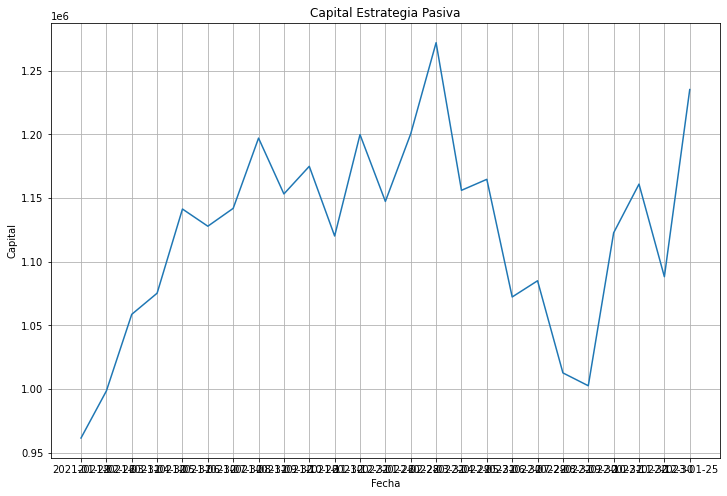

In [25]:
functions.display_pasive_results(cap_res, dates_fd, 1)


# Estrategia ACTIVA

In [19]:
#dates_fd --> fechas
#prices --> precios por accion de todo los 2 años

In [10]:

rf=0.00429

In [137]:
dates_fd[13]

'2022-02-28'

In [230]:
pcs = functions.get_ticker_prices(c_tickers, dates_fd[0], 1, '2022-03-01', '1d') # 1 día adelante

[*********************100%***********************]  31 of 31 completed


In [231]:
pond_mk = functions.mkwtz_port(rf, pcs)
pond_mk

,W,Precio
Ticker,,
AC.MX,29.8335,135.119995
ALFAA.MX,0.0000,15.340000
ALSEA.MX,12.5156,44.360001
AMXL.MX,0.0000,18.510000
ASURB.MX,0.5922,442.910004
BBAJIOO.MX,18.2177,49.750000
BIMBOA.MX,9.0600,63.070000
BOLSAA.MX,0.0000,39.220001
CEMEXCPO.MX,0.0000,10.520000


In [232]:
pcs2 = functions.get_ticker_prices(c_tickers, dates_fd[13:], 0)

[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  31 of 31 completed


In [237]:
titulos_ac = functions.get_titulos(pcs, '2022-02-28', comision, 965600.0, pond_mk.iloc[:,0])
titulos_ac

array([2129,    0, 2720,    0,   12, 3531, 1385,    0,    0,    0,    0,
          0,    0,    0,    0, 6684,    0,    0,    0,    0,    0,  644,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [238]:
res_df_a = pd.DataFrame(columns=['Amount'], index = [dates_fd[13:]])


In [239]:
def initial_active_port(port_info, prices, titulos, date, capital, res_df, cash):
    
    info = port_info[port_info['W'] != 0]
    ticks = info.index
    weights = info.iloc[:,0].values
    pcs = prices.loc[date]['Close'].loc[ticks].values
    titulos = [i for i in titulos if i != 0]
    
    df = pd.DataFrame(data = {'Tickers': ticks,
                             'Ponderación': weights,
                             f"Precio ({date})": pcs,
                             'Títulos': titulos
                             })
    
    cap = capital

    money = [(w / 100) * cap for w in weights]
    
    df['Valor posición'] = round(df[f"Precio ({date})"] * df['Títulos'], 2)
    
    res = [sum(money - df['Valor posición'])]
    res_df.loc[date] = cash + res
         
    df = df.append(df.sum(numeric_only=True), ignore_index=True)
    
    return df

In [240]:
initial_ap = initial_active_port(pond_mk, pcs2, titulos_ac, dates_fd[13], caps['Invested'][0], res_df_a, caps['Total Not Invested'][0])
initial_ap

,Tickers,Ponderación,Precio (2022-02-28),Títulos,Valor posición
0,AC.MX,29.8335,135.119995,2129.0,287670.47
1,ALSEA.MX,12.5156,44.360001,2720.0,120659.20
2,ASURB.MX,0.5922,442.910004,12.0,5314.92
3,BBAJIOO.MX,18.2177,49.750000,3531.0,175667.25
4,BIMBOA.MX,9.0600,63.070000,1385.0,87351.95
5,GFINBURO.MX,23.1351,33.380001,6684.0,223111.93
6,LIVEPOLC-1.MX,6.6458,99.459999,644.0,64052.24
7,NaN,99.9999,868.049999,17105.0,963827.96


In [343]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [905]:
def monthly_perf_active(ticks, weights, prices, titulos, date1: str, date2, capital, res_df, comision):

    # Nuevos precios
    df = pd.DataFrame(data = {'Tickers': ticks[:-1],
                             'Ponderación': weights[:-1], # PONDERACION Y TITULOS ALMACENADOS EN OTRO DF
                             f"Precio ({date2})": prices.loc[date2]['Close'][ticks.dropna()].values,
                             'Títulos': titulos[:-1]
                             })
    
    new_prices = df[f"Precio ({date2})"]
    old_prices = prices.loc[date1]['Close'][ticks.dropna()].values
    price_dif = percentage_change(old_prices, new_prices)
    
    price_dif_df = pd.DataFrame(data = {'Ticker': ticks[:-1],
                                       'Diferencia': price_dif}).sort_values(by = 'Diferencia', 
                                                                             ascending=False)
    price_dif_df = price_dif_df[(price_dif_df['Diferencia'] >= 5) | (price_dif_df['Diferencia'] <= -4)]
    
    
    cambio_titulos = df.set_index('Tickers').loc[price_dif_df['Ticker']].reset_index(inplace=False) # En orden
    cambio_titulos['Títulos nuevos'] = 0
    
    for i in range(len(cambio_titulos)):
        if price_dif_df.iloc[i,1] >= 5:
            cambio_titulos.iloc[i,4] = cambio_titulos.iloc[i,3] * (1 + 0.025)
        elif price_dif_df.iloc[i,1] <= -4:
            cambio_titulos.iloc[i,4] = cambio_titulos.iloc[i,3] * (1 - 0.025)
            
    dif_titulos = cambio_titulos.iloc[:,4] - cambio_titulos.iloc[:,3]
    cambio_titulos['Títulos nuevos'] = cambio_titulos['Títulos nuevos'].astype(int)
    cambio_titulos['Títulos Dif'] =  cambio_titulos['Títulos nuevos'] -  cambio_titulos['Títulos']
    cambio_titulos['Prices w/com'] = 0
    
    # Precios con comisión
    for i in range(len(cambio_titulos)):
        if cambio_titulos.iloc[i,5] > 0:
            cambio_titulos.iloc[i,6] = cambio_titulos.iloc[i,2] * (1 + comision)
        elif cambio_titulos.iloc[i,5] < 0:
            cambio_titulos.iloc[i,6] = cambio_titulos.iloc[i,2] * (1 - comision)
    
    cambio_titulos['Commission'] = cambio_titulos['Prices w/com'] - cambio_titulos.iloc[:,2]
    cambio_titulos['T * C'] = abs(cambio_titulos['Commission'] * cambio_titulos['Títulos Dif'])
    
    # Para las ventas
    ing = -cambio_titulos[cambio_titulos['Títulos Dif'] < 0].iloc[:,6] * cambio_titulos[cambio_titulos['Títulos Dif'] < 0].iloc[:,5]
    
    cap = (capital + ing).values
    #cap = 12300
    
    # Ajuste de acuerdo al capital
    for i in range(len(cambio_titulos[cambio_titulos['Títulos Dif'] > 0])): # Para los de compra
        if (cap / (cambio_titulos.iloc[i,5] * cambio_titulos.iloc[i,6])) >= 1:
            cambio_titulos.iloc[i,5] = cambio_titulos.iloc[i,5]
            cap = cap - (cambio_titulos.iloc[i,5] * cambio_titulos.iloc[i,6])
            print(cap)
        else:
            print('hola')
            cambio_titulos.iloc[i,5] = int((cap / cambio_titulos.iloc[i,6]))
            cap = cap - (cambio_titulos.iloc[i,5] * cambio_titulos.iloc[i,6])
    
    # Calcular el remaining al comprar títulos (YA ESTÁ EN CAP)
    # AJUSTAR DF
    
    
    # Comprar al precio actual (del df) mas comision
    
    #cap = capital

    #money = [(w / 100) * cap for w in weights]
    
    #df['Títulos'] = (money / df['Precio']).astype(int)
    #df['Valor posición'] = round(df[f"Precio ({date2})"] * df['Títulos'], 2)
    #df['Restante'] = money - df['Valor posición']
    
    # Diferencia entre precio * títulos y capital x ponderacion
    #res = [sum(money - df['Valor posición'])]
    #res_df.loc[date] += res
     
    #capital_f = np.sum(df['Valor posición'])
    
    #df = df.append(df.sum(numeric_only=True), ignore_index=True)
    
    return df


In [906]:
w = monthly_perf_active(initial_ap['Tickers'], initial_ap['Ponderación'], pcs2, initial_ap['Títulos'], dates_fd[13], dates_fd[14], res_df_a.iloc[0,0], res_df_a, comision)
w

[31302.95851667]
[27958.16270073]
[23146.47554695]


,Tickers,Ponderación,Precio (2022-03-31),Títulos
0,AC.MX,29.8335,135.250000,2129.0
1,ALSEA.MX,12.5156,49.860001,2720.0
2,ASURB.MX,0.5922,443.929993,12.0
3,BBAJIOO.MX,18.2177,54.610001,3531.0
4,BIMBOA.MX,9.0600,60.060001,1385.0
5,GFINBURO.MX,23.1351,41.669998,6684.0
6,LIVEPOLC-1.MX,6.6458,101.459999,644.0


In [883]:
1987.6158777236942 / 54.678263

36.351115940235594

In [870]:
(1987.6158777236942 / (w.iloc[2,5] * w.iloc[2,6])) >= 1

#capital / (cambio_titulos.iloc[0,5] * cambio_titulos.iloc[0,6]) 

False

In [855]:
w.iloc[:3,5] * w.iloc[:3,6]

AttributeError: 'tuple' object has no attribute 'iloc'

In [850]:
6967.588306 + 3344.795816 + 2000


12312.384122

In [808]:
int(88 * (36171.07440000002 / 40000))

79

In [821]:
38270.546823 - 15124.071276054383

23146.475546945614

In [814]:
(w.iloc[:3,5] * w.iloc[:3,6]).sum()

15124.071276054383

In [815]:
36171.07440000002 - (w.iloc[:3,5] * w.iloc[:3,6]).sum()

21047.003123945637

In [777]:
(w.iloc[:3,5] * w.iloc[:3,6]).sum()

15124.071276054383

In [779]:
(w[w['Títulos Dif'] > 0].iloc[:,6] * w[w['Títulos Dif'] > 0].iloc[:,5]).sum()

15124.071276054383

In [626]:
res_df_a.iloc[0,:]

Amount    36171.0744
Name: (2022-02-28,), dtype: object

In [492]:
w[w['Tickers'].isin(w['Ticker'].tolist())]

KeyError: 'Tickers'

In [494]:
w['Ticker'].tolist()

['GFINBURO.MX', 'ALSEA.MX', 'BBAJIOO.MX', 'BIMBOA.MX']

In [383]:
w2 = initial_ap.iloc[:,2]
w2

0    135.119995
1     44.360001
2    442.910004
3     49.750000
4     63.070000
5     33.380001
6     99.459999
7    868.049999
Name: Precio (2022-02-28), dtype: float64

In [351]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [363]:
percentage_change(w, w2)

0    140336.364277
1       257.783573
2    192224.886557
3       409.272055
4     -1421.537236
5        34.405894
6      4846.145709
7              NaN
dtype: float64

In [241]:
res_df_a

,Amount
2022-02-28,36171.0744
2022-03-31,NaN
2022-04-29,NaN
2022-05-31,NaN
2022-06-30,NaN
2022-07-29,NaN
2022-08-31,NaN
2022-09-30,NaN
2022-10-31,NaN
2022-11-30,NaN


In [101]:
pond_mk.index

Index(['AC.MX', 'ALFAA.MX', 'ALSEA.MX', 'AMXL.MX', 'ASURB.MX', 'BBAJIOO.MX',
       'BIMBOA.MX', 'BOLSAA.MX', 'CEMEXCPO.MX', 'CUERVO.MX', 'ELEKTRA.MX',
       'FEMSAUBD.MX', 'GAPB.MX', 'GCARSOA1.MX', 'GCC.MX', 'GFINBURO.MX',
       'GFNORTEO.MX', 'GMEXICOB.MX', 'GRUMAB.MX', 'KIMBERA.MX', 'KOFUBL.MX',
       'LIVEPOLC-1.MX', 'MEGACPO.MX', 'OMAB.MX', 'ORBIA.MX', 'PE&OLES.MX',
       'PINFRA.MX', 'Q.MX', 'TLEVISACPO.MX', 'VESTA.MX', 'WALMEX.MX'],
      dtype='object', name='Ticker')

In [ ]:
# Comprar títulos de acuerdo a los pesos (check)
# Obtener el rendimiento de los tickers el siguiente mes
# Si aumenta o disminuye 5% el precio, comprar o vender x% de títulos

# If que la cantidad a comprar sea menor a la cantidad de cash

# Calcular el remaining al comprar títulos
# Calcular/implementar comisiones al comprar y vender

# Guardar registro de cada operación

In [ ]:
acc1 = [if pcs2[0][i+1] > pcs2[0][i]*0.95]     true/false 

acc2 = [if pcs2[1][i+1] > pcs2[1][i]*0.95]     true/false   

if statement[0]: df[titulos][0] = df[titulos][1] * 0.975 #/ 1.025

In [87]:
if pcs2.iloc[i + 1, 0] < 0.95 * df['Precio (hola)'][i]:
    df['Títulos'] = df['Títulos'] * 0.975
elif pcs2.iloc[i + 1, 0] > 1.05 * df['Precio (hola)'][i]:
    if cash >= titulos * 0.025 * pcs2.iloc[i + 1, 0]:
        df['Títulos'] = df['Títulos'] * 1.025
    
    


SyntaxError: invalid syntax (<ipython-input-87-9ce86e0c947d>, line 1)

## Plantillas Dataframes

In [ ]:
import pandas as pd

In [8]:
#PASIVA

comision = 0.00125 
# Creating DataFrame
df = pd.DataFrame(columns=['timestamp', 'capital', 'rend', 'rend_acum'])

capital = [precio[i] * ponderacion[i] for i in range(len(c_tickers))]
df['capital'] = capital

df['rend'] = [df['capital'][i] - df['capital'][i+1] for i in range(len(df))]

df['rend_acum'] = cumsum(df['rend'])

#Estableciendo lo inicial
df['capital'][0] = capital - comision
df['rend'][0] = 0
df['rend_acum'][0] = 0

df['capital'][-1] = df['capital'][-1] - comision

#print(df)
df

,timestamp,capital,rend,rend_acum


In [7]:
#ACTIVA

# Creating DataFrame
df2 = pd.DataFrame(columns=['timestamp', 'titulos_totales', 'titulos_compra', 'comisión', 'comision_acum'])

df2['titulos totales'] = capital

df2['titulos_compra'] = [df['capital'][i] - df['capital'][i+1] for i in range(len(df))]

df2['comision'] = 

df2['comision_acum'] = cumsum(df['comision'])


#print(df2)
df2

,timestamp,titulos_totales,titulos_compra,comisión,comision_acum


In [6]:
#NOTA: rf : Tasa libre de riesgo para México, anual al 01 de enero 2021 (0.0429)


# Creating DataFrame
data333 = {'medida': ['rend_m', 'rend_c', 'sharpe'],
        'descripcion': ['Rendimiento Promedio Mensual', 'Rendimiento Mensual Acumulado', 'Sharpe Ratio']}
df3 = pd.DataFrame(data333, columns=['medida', 'descripcion', 'inv_activa', 'inv_pasiva'])

  
# Printing Empty DataFrame
df3

,medida,descripcion,inv_activa,inv_pasiva
0,rend_m,Rendimiento Promedio Mensual,NaN,NaN
1,rend_c,Rendimiento Mensual Acumulado,NaN,NaN
2,sharpe,Sharpe Ratio,NaN,NaN


In [2]:

summary = pd.DataFrame()
summary ['Media'] = 12 * returns.mean()
summary['Vol'] = np.sqrt(12) * returns.std()
#summary

rf=0.0429

Eind = summary.T.loc['Media']


# Función objetivo
def var(w, Sigma):    
    return w.T.dot(Sigma).dot(w)


# Número de activos
N = len(Eind_15)
# Dato inicial
w0 = np.ones(N) / N
# Cotas de las variables
bnds = ((0,1), ) * N
# Restricciones
cons = {'type': 'eq', 'fun': lambda w:w.sum() - 1}


# Función objetivo
def menos_RS(w, Eind, rf, Sigma):    
    E_port = Eind.T.dot(w)    
    s_port = var(w, Sigma)**0.5    
    RS = (E_port - rf) / s_port    
    return -RS


# Portafolio EMV
emv_15 = minimize(fun=menos_RS, x0 = w0, args = (Eind, rf, cov), bounds = bnds, constraints = cons, tol = 1e-10)

cov = 12 * returns.cov()

w_emv = emv_15.x



if price[i] < 95%*price[i]:
    titulos = titulos*97.5%
elif price[i] > 95%*price[i]:
    titulos = titulos*102.5%
    


NameError: name 'prices' is not defined